## Module 4: General Linear Regression: Multiple Linear Regression and other regression models

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [1]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
data['MedianHouseValue'] = california.target

Look at the data using `.info()` and `.describe()`.

In [2]:
# Display basic information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.4

### Step 1

Let the `X` variable be `MedInc`, `AveRooms`, and `HouseAge` and `y` be `MedianHouseValue`.

Then add the constant for the intercept.

Next, create the baseline model, called `baseline_model` using `smf.ols` for the above variables, and fit the model.

To verify the mdoel, return the $r^2$ value rounded to four decimal places.

In [10]:
# CodeGrade step1
X = data[['MedInc', 'AveRooms', 'HouseAge']]
y = california.target
X_const = sm.add_constant(X)
baseline_model = sm.OLS(y, X_const).fit()
r_squared_baseline = baseline_model.rsquared
np.round(r_squared_baseline, 4)

0.5121

Now print the model summary.

In [5]:
# Print model summary
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:42:53   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.022      0.928      0.353      -0.023       0.063
MedInc         0.4428      0.003    141.292      0.000       0.437       0.449
AveRooms      -0.0272      0.002    -11.231      0.000      -0.032      -0.022
HouseAge       0.0168      0.000     37.185      0.000       0.016       0.018
==============================================================================
Omnibus:                     4387.129   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11558.910
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 2


Add a quadratic term to the data called `MedInc_squared`, which is what it sounds like.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `nonlinear_model`. Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.



In [ ]:
# CodeGrade step2
data['MedInc_squared'] = data['MedInc'] ** 2
nonlinear_model = smf.ols(formula='MedianHouseValue ~ AveRooms + HouseAge + MedInc + MedInc_squared', data=data).fit()
r_squared_nonlinear = nonlinear_model.rsquared
np.round(r_squared_nonlinear, 6)

0.52017

Now print the model summary.

In [13]:
# Print the summary
nonlinear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5592.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:00:21   Log-Likelihood:                -24664.
No. Observations:               20640   AIC:                         4.934e+04
Df Residuals:                   20635   BIC:                         4.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3310      0.029    -11.482      0.000      -0.388      -0.275
AveRooms          -0.0285      0.002    -11.878      0.000      -0.033      -0.024
HouseAge           0.0177      0.000     39.193      0.000       0.017       0.019
MedInc             0.5965      0.009     67.630      0.000       0.579       0.614
MedInc_squared    -0.0140      0.001    -18.627      0.000      -0.016      -0.013
==============================================================================
Omnibus:                     4548.331   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11933.196
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       5.862   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 3

Add (again) the same quadratic term, but now also add an interaction term that represents the interaction between `MedInc` and `AveRooms`.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `interaction_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [34]:
# CodeGrade step3
data['MedInc_squared'] = data['MedInc'] ** 2
data['MedInc_AveRooms'] = data['MedInc'] * data['AveRooms']
interaction_model = smf.ols(formula='MedianHouseValue ~ AveRooms + HouseAge + MedInc + MedInc_squared + MedInc * AveRooms', data=data).fit()
r_squared_interaction = interaction_model.rsquared
np.round(r_squared_interaction, 6)

0.520213

Now print the model summary.

In [16]:
# Print the summary
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4475.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:03:21   Log-Likelihood:                -24663.
No. Observations:               20640   AIC:                         4.934e+04
Df Residuals:                   20634   BIC:                         4.939e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3027      0.036     -8.503      0.000      -0.372      -0.233
AveRooms           -0.0353      0.006     -6.339      0.000      -0.046      -0.024
HouseAge            0.0177      0.000     39.215      0.000       0.017       0.019
MedInc              0.5898      0.010     58.268      0.000       0.570       0.610
MedInc_squared     -0.0147      0.001    -16.381      0.000      -0.016      -0.013
MedInc:AveRooms     0.0021      0.002      1.359      0.174      -0.001       0.005
==============================================================================
Omnibus:                     4617.781   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12429.560
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       5.949   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 4

Add (again) the same quadratic term as in the previous two steps.

Create an indicator variable by
1.   Find the median of `MedInc`, call this `median_income_threshold`
2.   Adding a new variable to the data set callede `HighIncome` that assigns a 1 to any value strictly greater than the median, and otherwise it assigns a 0.

Now fit the model using `smf.ols` with the quadratic term and indicator variable, calling this model, `indicator_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [35]:
# CodeGrade step4
data['MedInc_squared'] = data['MedInc'] ** 2
median_income_threshold = data['MedInc'].median()
data['HighIncome'] = np.where(data['MedInc'] > median_income_threshold, 1, 0)
indicator_model = smf.ols(formula='MedianHouseValue ~ AveRooms + HouseAge + MedInc + MedInc_squared + HighIncome', data=data).fit()
r_squared_indicator = indicator_model.rsquared
np.round(r_squared_indicator, 6)

0.520496

Now print the model summary.

In [19]:
# Print the summary
indicator_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4480.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:07:02   Log-Likelihood:                -24657.
No. Observations:               20640   AIC:                         4.933e+04
Df Residuals:                   20634   BIC:                         4.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3966      0.034    -11.760      0.000      -0.463      -0.330
AveRooms          -0.0284      0.002    -11.862      0.000      -0.033      -0.024
HouseAge           0.0177      0.000     39.246      0.000       0.017       0.019
MedInc             0.6325      0.013     48.507      0.000       0.607       0.658
MedInc_squared    -0.0160      0.001    -17.341      0.000      -0.018      -0.014
HighIncome        -0.0741      0.020     -3.744      0.000      -0.113      -0.035
==============================================================================
Omnibus:                     4600.521   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12195.535
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       5.900   Cond. No.                         258.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5

Add (again) the same quadratic term, but now also add an log transformed term of `AveRooms` called `log_AveRooms`.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `log_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [36]:
# CodeGrade step5
data['MedInc_squared'] = data['MedInc'] ** 2
data['log_AveRooms'] = np.log(data['AveRooms'])
log_model = smf.ols(formula='MedianHouseValue ~ AveRooms + HouseAge + MedInc + MedInc_squared + log_AveRooms', data=data).fit()
r_squared_log = log_model.rsquared
np.round(r_squared_log, 6)

0.54855

Now print the model summary.

In [37]:
# Print the summary
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     5014.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:32:02   Log-Likelihood:                -24035.
No. Observations:               20640   AIC:                         4.808e+04
Df Residuals:                   20634   BIC:                         4.813e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0824      0.048     22.461      0.000       0.988       1.177
AveRooms           0.0754      0.004     20.342      0.000       0.068       0.083
HouseAge           0.0157      0.000     35.640      0.000       0.015       0.017
MedInc             0.7159      0.009     78.024      0.000       0.698       0.734
MedInc_squared    -0.0190      0.001    -25.540      0.000      -0.020      -0.018
log_AveRooms      -1.3904      0.039    -36.016      0.000      -1.466      -1.315
==============================================================================
Omnibus:                     4086.408   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10719.154
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       5.799   Cond. No.                         419.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 6

Return the shape of `log_model`'s residuals.

In [23]:
# CodeGrade step6
log_residuals = log_model.resid
log_residuals.shape

(20640,)

Now for the log model, plot the resisuals vs. the fitted values and the Q-Q plot.

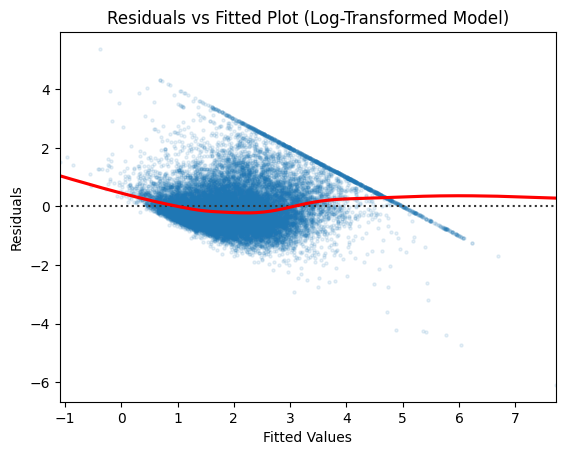

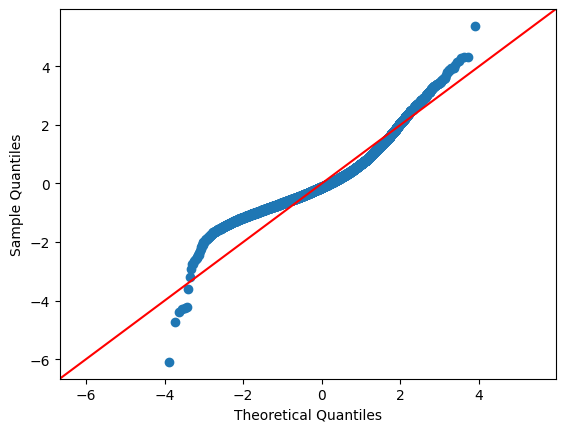

In [32]:
# Residuals vs. Fitted Plot
sns.residplot(x=log_model.fittedvalues, y=log_model.resid, lowess=True, line_kws={"color": "red"}, scatter_kws={"s": 5, "alpha": 0.1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Log-Transformed Model)")
plt.show()

# Q-Q Plot
fig = sm.qqplot(log_residuals, line='45')
plt.show()